# AMS Solar Energy Prediction

## Data Loading from Kaggle

In [ ]:
from google.colab import files
files.upload()

In [ ]:
! mkdir ~/.kaggle/
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle competitions download --force ams-2014-solar-energy-prediction-contest

100% 2.84G/2.84G [00:22<00:00, 119MB/s]
100% 2.84G/2.84G [00:22<00:00, 135MB/s]


In [ ]:
!rm -rf data

In [ ]:
! unzip ams-2014-solar-energy-prediction-contest.zip -d data

Archive:  ams-2014-solar-energy-prediction-contest.zip
  inflating: data/gefs_elevations.nc  
  inflating: data/gefs_test.tar.gz   
  inflating: data/gefs_test.zip      
  inflating: data/gefs_train.tar.gz  
  inflating: data/gefs_train.zip     
  inflating: data/sampleSubmission.csv  
  inflating: data/solar_training_199401_200712.csv  
  inflating: data/station_info.csv   
  inflating: data/test.csv           
  inflating: data/train.csv          


In [ ]:
! unzip /content/data/gefs_train.zip -d data/gefs_train

Archive:  /content/data/gefs_train.zip
   creating: data/gefs_train/train/
  inflating: data/gefs_train/train/apcp_sfc_latlon_subset_19940101_20071231.nc  
  inflating: data/gefs_train/train/dlwrf_sfc_latlon_subset_19940101_20071231.nc  
  inflating: data/gefs_train/train/dswrf_sfc_latlon_subset_19940101_20071231.nc  
  inflating: data/gefs_train/train/pres_msl_latlon_subset_19940101_20071231.nc  
  inflating: data/gefs_train/train/pwat_eatm_latlon_subset_19940101_20071231.nc  
  inflating: data/gefs_train/train/spfh_2m_latlon_subset_19940101_20071231.nc  
  inflating: data/gefs_train/train/tcdc_eatm_latlon_subset_19940101_20071231.nc  
  inflating: data/gefs_train/train/tcolc_eatm_latlon_subset_19940101_20071231.nc  
  inflating: data/gefs_train/train/tmax_2m_latlon_subset_19940101_20071231.nc  
  inflating: data/gefs_train/train/tmin_2m_latlon_subset_19940101_20071231.nc  
  inflating: data/gefs_train/train/tmp_2m_latlon_subset_19940101_20071231.nc  
  inflating: data/gefs_train/trai

In [ ]:
! unzip /content/data/gefs_test.zip -d data/gefs_test

Archive:  /content/data/gefs_test.zip
   creating: data/gefs_test/test/
  inflating: data/gefs_test/test/apcp_sfc_latlon_subset_20080101_20121130.nc  
  inflating: data/gefs_test/test/dlwrf_sfc_latlon_subset_20080101_20121130.nc  
  inflating: data/gefs_test/test/dswrf_sfc_latlon_subset_20080101_20121130.nc  
  inflating: data/gefs_test/test/pres_msl_latlon_subset_20080101_20121130.nc  
  inflating: data/gefs_test/test/pwat_eatm_latlon_subset_20080101_20121130.nc  
  inflating: data/gefs_test/test/spfh_2m_latlon_subset_20080101_20121130.nc  
  inflating: data/gefs_test/test/tcdc_eatm_latlon_subset_20080101_20121130.nc  
  inflating: data/gefs_test/test/tcolc_eatm_latlon_subset_20080101_20121130.nc  
  inflating: data/gefs_test/test/tmax_2m_latlon_subset_20080101_20121130.nc  
  inflating: data/gefs_test/test/tmin_2m_latlon_subset_20080101_20121130.nc  
  inflating: data/gefs_test/test/tmp_2m_latlon_subset_20080101_20121130.nc  
  inflating: data/gefs_test/test/tmp_sfc_latlon_subset_200

# Code

In [ ]:
pip install netCDF4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 52.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 83.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import os
import datetime

# for loading netCDF4 Files
import netCDF4 as nc
import xarray as xr
from netCDF4 import Dataset

In [ ]:
# Configs
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
os.listdir()

['.config',
 'ams-2014-solar-energy-prediction-contest.zip',
 'data',
 'kaggle.json',
 'sample_data']

In [ ]:
# Lbraries to unzip compressed data folders
import tarfile
import zipfile
# some libraries for lat-long cartesian product
import itertools

### Note for Data Set
These are the same data

* solar_training_199401_200712.csv &&
* train.csv
* Both tarzip and zip file contents are identical to each other. We will go for anyone

In [ ]:
df_train_csv_path = '/content/data/train.csv'
df_train_csv = pd.read_csv(df_train_csv_path)
df_train_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5113 entries, 0 to 5112
Data columns (total 99 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Date    5113 non-null   int64
 1   ACME    5113 non-null   int64
 2   ADAX    5113 non-null   int64
 3   ALTU    5113 non-null   int64
 4   APAC    5113 non-null   int64
 5   ARNE    5113 non-null   int64
 6   BEAV    5113 non-null   int64
 7   BESS    5113 non-null   int64
 8   BIXB    5113 non-null   int64
 9   BLAC    5113 non-null   int64
 10  BOIS    5113 non-null   int64
 11  BOWL    5113 non-null   int64
 12  BREC    5113 non-null   int64
 13  BRIS    5113 non-null   int64
 14  BUFF    5113 non-null   int64
 15  BURB    5113 non-null   int64
 16  BURN    5113 non-null   int64
 17  BUTL    5113 non-null   int64
 18  BYAR    5113 non-null   int64
 19  CAMA    5113 non-null   int64
 20  CENT    5113 non-null   int64
 21  CHAN    5113 non-null   int64
 22  CHER    5113 non-null   int64
 23  CHEY    5113 

#### Elevations of GEFS models
Decided not to use elevation informaiton to keep model simple, but still checking what's inside to consider adding for maybe further advancements

In [ ]:
elevations_nc_path = '/content/data/gefs_elevations.nc'
elevations_nc = Dataset(elevations_nc_path)
print(repr(elevations_nc))

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    dimensions(sizes): lon(16), lat(9)
    variables(dimensions): float32 elevation_control(lat, lon), float32 elevation_perturbation(lat, lon), float32 latitude(lat, lon), float32 longitude(lat, lon)
    groups: 


In [ ]:
# Dimensions of nc4
for dim in elevations_nc.dimensions.values():
    print(dim)

<class 'netCDF4._netCDF4.Dimension'>: name = 'lon', size = 16
<class 'netCDF4._netCDF4.Dimension'>: name = 'lat', size = 9


In [ ]:
#variables
for var in elevations_nc.variables.values():
    print(var)
    print("--"*50)

<class 'netCDF4._netCDF4.Variable'>
float32 elevation_control(lat, lon)
    units: m
unlimited dimensions: 
current shape = (9, 16)
filling on, default _FillValue of 9.969209968386869e+36 used
----------------------------------------------------------------------------------------------------
<class 'netCDF4._netCDF4.Variable'>
float32 elevation_perturbation(lat, lon)
    units: m
unlimited dimensions: 
current shape = (9, 16)
filling on, default _FillValue of 9.969209968386869e+36 used
----------------------------------------------------------------------------------------------------
<class 'netCDF4._netCDF4.Variable'>
float32 latitude(lat, lon)
unlimited dimensions: 
current shape = (9, 16)
filling on, default _FillValue of 9.969209968386869e+36 used
----------------------------------------------------------------------------------------------------
<class 'netCDF4._netCDF4.Variable'>
float32 longitude(lat, lon)
unlimited dimensions: 
current shape = (9, 16)
filling on, default _Fil

In [ ]:
elevations_nc['elevation_control']

<class 'netCDF4._netCDF4.Variable'>
float32 elevation_control(lat, lon)
    units: m
unlimited dimensions: 
current shape = (9, 16)
filling on, default _FillValue of 9.969209968386869e+36 used

In [ ]:
elevation_control = elevations_nc['elevation_control'][:]
type(elevation_control)

numpy.ma.core.MaskedArray

In [ ]:
elevation_control

masked_array(
  data=[[1420.6992  , 1346.99    , 1323.4714  ,  878.6121  ,  801.2428  ,
          772.9914  ,  680.35266 ,  468.4641  ,  336.59415 ,  120.04214 ,
           93.48233 ,   80.08353 ,   71.31673 ,   67.957   ,   10.965302,
           84.810104],
        [1474.9441  , 1352.801   ,  898.3811  ,  931.03394 ,  826.7518  ,
          727.6931  ,  609.3953  ,  482.50412 ,  337.76724 ,  183.77028 ,
          102.97228 ,  126.72296 ,   79.13975 ,   45.891365,   33.39725 ,
           45.70796 ],
        [1580.3839  , 1424.2161  , 1176.4006  , 1125.1444  ,  948.3373  ,
          705.66315 ,  500.02255 ,  368.81665 ,  315.66757 ,  163.46469 ,
          154.10419 ,  121.9053  ,   75.232796,   77.09505 ,   30.765553,
           26.19909 ],
        [1893.4783  , 1518.9108  , 1275.5542  , 1200.2124  , 1043.7601  ,
          853.4426  ,  502.6673  ,  344.78058 ,  267.40408 ,  229.86818 ,
          159.78786 ,  141.98071 ,  131.23152 ,   71.77977 ,   69.824265,
           45.698303],
      

In [ ]:
elevation_perturbation = elevations_nc['elevation_perturbation'][:]
latitude = elevations_nc['latitude'][:]
longitude = elevations_nc['longitude'][:]

In [ ]:
variables = [elevation_control, elevation_perturbation, latitude, longitude]
for v in variables:
    print(v.shape)

(9, 16)
(9, 16)
(9, 16)
(9, 16)


In [ ]:
type(elevation_control[:].data)

numpy.ndarray

In [ ]:
elevation_control[0]

masked_array(data=[1420.6992  , 1346.99    , 1323.4714  ,  878.6121  ,
                    801.2428  ,  772.9914  ,  680.35266 ,  468.4641  ,
                    336.59415 ,  120.04214 ,   93.48233 ,   80.08353 ,
                     71.31673 ,   67.957   ,   10.965302,   84.810104],
             mask=False,
       fill_value=1e+20,
            dtype=float32)

In [ ]:
df_elevation_control = pd.DataFrame(elevation_control[:].data)
type(df_elevation_control)

pandas.core.frame.DataFrame

In [ ]:
df_elevation_perturbation = pd.DataFrame(elevation_perturbation[:].data)
df_latitude = pd.DataFrame(latitude[:].data)
df_longitude = pd.DataFrame(longitude[:].data)

In [ ]:
df_elevation_perturbation

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1342.618286,1328.494019,1244.265381,919.849365,821.093567,758.447449,615.643372,470.274231,320.599396,140.990585,95.808876,76.553787,68.223305,54.343769,17.772333,68.332054
1,1378.946899,1413.052734,1016.232666,901.592529,857.843262,718.281189,608.255981,486.923950,339.535858,164.368851,117.535713,116.339043,77.805992,61.092579,23.557766,55.404343
2,1742.829468,1598.147095,1091.234985,1178.574707,909.058228,734.515381,526.780579,401.441864,306.543365,199.786942,154.201813,114.928963,67.071960,64.649948,41.842697,25.231009
3,1917.667603,1581.581421,1253.453613,1266.165649,1054.519165,810.194275,486.443268,356.452789,293.866455,243.864334,176.021362,179.507385,181.330063,103.315552,63.461838,43.063847
4,1943.164673,1737.107910,1346.499023,1267.450073,1100.414185,860.616638,591.403748,464.848663,393.638275,308.563354,239.184402,235.344528,261.833069,191.366211,103.257118,52.340797
5,2440.409424,2173.584961,1600.870117,1329.651855,1070.052246,925.863770,744.821289,552.047974,374.450439,293.335205,210.905609,247.777985,417.626984,374.962616,217.766586,97.133163
6,2644.048096,2512.552002,1908.914551,1526.862671,1099.935303,877.244324,699.824402,535.322266,379.931183,345.195251,265.756439,257.140961,350.137054,353.257263,329.077271,245.794418
7,2687.393066,2082.603271,1397.668945,1258.560547,1109.736816,912.408508,762.931458,630.918640,493.396973,429.999481,356.559753,282.100952,274.491608,297.353119,303.076538,276.219391
8,3124.591064,2300.221191,1725.342407,1475.911377,1166.599854,957.809692,731.922729,573.204895,446.799713,396.012909,352.090088,295.501587,254.907104,227.474518,224.604065,187.092941


In [ ]:
df_latitude

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,31.0,31.0,31.0,31.0,31.0,31.0,31.0,31.0,31.0,31.0,31.0,31.0,31.0,31.0,31.0,31.0
1,32.0,32.0,32.0,32.0,32.0,32.0,32.0,32.0,32.0,32.0,32.0,32.0,32.0,32.0,32.0,32.0
2,33.0,33.0,33.0,33.0,33.0,33.0,33.0,33.0,33.0,33.0,33.0,33.0,33.0,33.0,33.0,33.0
3,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0
4,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0
5,36.0,36.0,36.0,36.0,36.0,36.0,36.0,36.0,36.0,36.0,36.0,36.0,36.0,36.0,36.0,36.0
6,37.0,37.0,37.0,37.0,37.0,37.0,37.0,37.0,37.0,37.0,37.0,37.0,37.0,37.0,37.0,37.0
7,38.0,38.0,38.0,38.0,38.0,38.0,38.0,38.0,38.0,38.0,38.0,38.0,38.0,38.0,38.0,38.0
8,39.0,39.0,39.0,39.0,39.0,39.0,39.0,39.0,39.0,39.0,39.0,39.0,39.0,39.0,39.0,39.0


In [ ]:
df_longitude

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,254.0,255.0,256.0,257.0,258.0,259.0,260.0,261.0,262.0,263.0,264.0,265.0,266.0,267.0,268.0,269.0
1,254.0,255.0,256.0,257.0,258.0,259.0,260.0,261.0,262.0,263.0,264.0,265.0,266.0,267.0,268.0,269.0
2,254.0,255.0,256.0,257.0,258.0,259.0,260.0,261.0,262.0,263.0,264.0,265.0,266.0,267.0,268.0,269.0
3,254.0,255.0,256.0,257.0,258.0,259.0,260.0,261.0,262.0,263.0,264.0,265.0,266.0,267.0,268.0,269.0
4,254.0,255.0,256.0,257.0,258.0,259.0,260.0,261.0,262.0,263.0,264.0,265.0,266.0,267.0,268.0,269.0
5,254.0,255.0,256.0,257.0,258.0,259.0,260.0,261.0,262.0,263.0,264.0,265.0,266.0,267.0,268.0,269.0
6,254.0,255.0,256.0,257.0,258.0,259.0,260.0,261.0,262.0,263.0,264.0,265.0,266.0,267.0,268.0,269.0
7,254.0,255.0,256.0,257.0,258.0,259.0,260.0,261.0,262.0,263.0,264.0,265.0,266.0,267.0,268.0,269.0
8,254.0,255.0,256.0,257.0,258.0,259.0,260.0,261.0,262.0,263.0,264.0,265.0,266.0,267.0,268.0,269.0


#### GEFS files

The Global Ensemble Forecast System (GEFS) is a weather forecast model made up of 21 separate forecasts, or ensemble members. The National Centers for Environmental Prediction (NCEP) started the GEFS to address the nature of uncertainty in weather observations, which are used to initialize weather forecast models.

Both tarzip and zip file contents are identical to each other. We will go with tarfile.

In [ ]:
nc_pwat_eatm_latlon_path = '/content/data/gefs_train/train/pwat_eatm_latlon_subset_19940101_20071231.nc'
nc_pwat_eatm_latlon = Dataset(nc_pwat_eatm_latlon_path)
print(repr(nc_pwat_eatm_latlon))

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    Conventions: CF-1.0
    title: Subset of data from 2nd-generation multi-decadal ensemble reforecast generated from the NCEP Global Ensemble Forecast System, mimicking version operational at NCEP/EMC circa mid-2012.
    institution: NOAA Earth System Research Laboratory (ESRL)
    source: NCEP GFS v 9.01, T254L42.  Control initial conditions from CFSRR.  Perturbed initial conditions from ETR.  Model error simulated with STTP.
    references: http://www.esrl.noaa.gov/psd/forecasts/reforecast2/index.html
    history: Subset created 2013-01-15 19:18:02 UTC
    comment: Original dataset generated on DOE's supercomputers at Lawrence Berkeley Laboratory through ALCC/ASCR grant.
    dimensions(sizes): time(5113), lat(9), lon(16), ens(11), fhour(5)
    variables(dimensions): float64 time(time), int32 intTime(time), float32 lat(lat), float32 lon(lon), int16 ens(ens), int32 fhour(fhour), int32 intValidTime(t

In [ ]:
# Dimensions of nc4
for dim in nc_pwat_eatm_latlon.dimensions.values():
    print(dim)

print()
print("*-*"*50)

#variables
for var in nc_pwat_eatm_latlon.variables.values():
    print(var)
    print("--"*50)

<class 'netCDF4._netCDF4.Dimension'>: name = 'time', size = 5113
<class 'netCDF4._netCDF4.Dimension'>: name = 'lat', size = 9
<class 'netCDF4._netCDF4.Dimension'>: name = 'lon', size = 16
<class 'netCDF4._netCDF4.Dimension'>: name = 'ens', size = 11
<class 'netCDF4._netCDF4.Dimension'>: name = 'fhour', size = 5

*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*
<class 'netCDF4._netCDF4.Variable'>
float64 time(time)
    long_name: Time
    units: hours since 1800-01-01 00:00:00
    axis: T
unlimited dimensions: 
current shape = (5113,)
filling on, default _FillValue of 9.969209968386869e+36 used
----------------------------------------------------------------------------------------------------
<class 'netCDF4._netCDF4.Variable'>
int32 intTime(time)
    long_name: time as an integer (YYYYMMDDHH)
unlimited dimensions: 
current shape = (5113,)
filling on, default _FillValue of -2147483647 

In [ ]:
nc_time = nc_pwat_eatm_latlon['time'][:]
nc_time

masked_array(data=[1700568., 1700592., 1700616., ..., 1823208., 1823232.,
                   1823256.],
             mask=False,
       fill_value=1e+20)

In [ ]:
df_nc_time = pd.DataFrame(nc_pwat_eatm_latlon['time'][:][:].data)
df_nc_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5113 entries, 0 to 5112
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       5113 non-null   float64
dtypes: float64(1)
memory usage: 40.1 KB


In [ ]:
df_nc_time.head()

,0
0,1700568.0
1,1700592.0
2,1700616.0
3,1700640.0
4,1700664.0


In [ ]:
df_nc_lat = pd.DataFrame(nc_pwat_eatm_latlon['lat'][:][:].data)
df_nc_lat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       9 non-null      float32
dtypes: float32(1)
memory usage: 164.0 bytes


In [ ]:
df_nc_lat

,0
0,31.0
1,32.0
2,33.0
3,34.0
4,35.0
5,36.0
6,37.0
7,38.0
8,39.0


In [ ]:
df_nc_lon = pd.DataFrame(nc_pwat_eatm_latlon['lon'][:][:].data)
df_nc_lon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       16 non-null     float32
dtypes: float32(1)
memory usage: 192.0 bytes


In [ ]:
df_nc_ens = pd.DataFrame(nc_pwat_eatm_latlon['ens'][:][:].data)
df_nc_ens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       11 non-null     int16
dtypes: int16(1)
memory usage: 150.0 bytes


In [ ]:
df_nc_ens

,0
0,0
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8
9,9


In [ ]:
df_nc_fhour = pd.DataFrame(nc_pwat_eatm_latlon['fhour'][:][:].data)
df_nc_fhour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       5 non-null      int32
dtypes: int32(1)
memory usage: 148.0 bytes


In [ ]:
df_nc_fhour

,0
0,12
1,15
2,18
3,21
4,24


#### Aggregating over hour dimension: using mean value instead of 3hourly observations

In [ ]:
# Precipitable_water
nc_prcp = list(nc_pwat_eatm_latlon.variables.values())[-1]
#nc_prcp = nc_pwat_eatm_latlon['Precipitable_water'][:]
print("Index 2 refers to the hours: ")
print("Values for: \n -the first day, \n -first ensemble model, \n -first latitude, \n -first longitude, \n -and hours, 12-15-18-21-24 ")
print("=="*50, "\n")
print(nc_prcp[0,0,0,0,0], nc_prcp[0,0,1,0,0], nc_prcp[0,0,2,0,0], nc_prcp[0,0,3,0,0], nc_prcp[0,0,4,0,0])
print("=="*50, "\n")
print("Average value we should expect to get if we take mean of ")
print(sum([nc_prcp[0,0,0,0,0], nc_prcp[0,0,1,0,0], nc_prcp[0,0,2,0,0], nc_prcp[0,0,3,0,0], nc_prcp[0,0,4,0,0]])/5)

Index 2 refers to the hours: 
Values for: 
 -the first day, 
 -first ensemble model, 
 -first latitude, 
 -first longitude, 
 -and hours, 12-15-18-21-24 

5.7 5.6 6.1 6.4 6.7

Average value we should expect to get if we take mean of 
6.099999904632568


In [ ]:
nc_4dim = np.mean(nc_prcp, axis=2)
nc_4dim[0,0,0,0]

6.1

In [ ]:
nc_4dim.shape

(5113, 11, 9, 16)

#### Extracting each GEFS location's coordinates in pairs (lat,lon)

In [ ]:
# some libraries for lat-long cartesian product
import itertools

we will be only selecting the ones close to mesonet points as a starter.

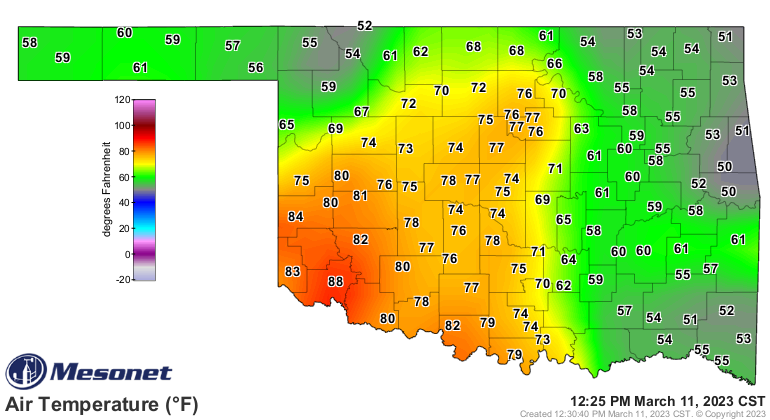

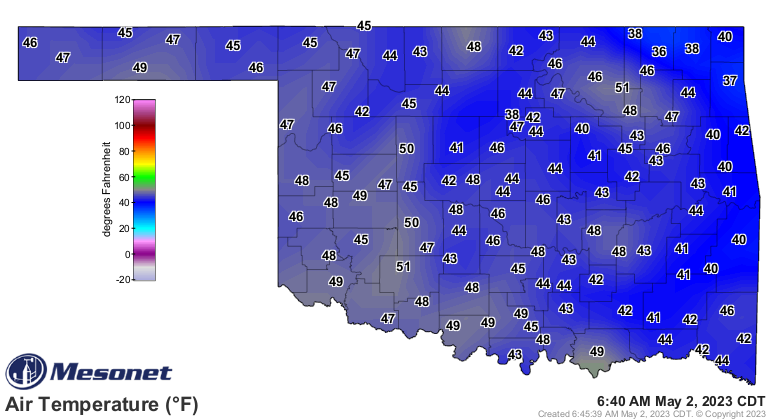

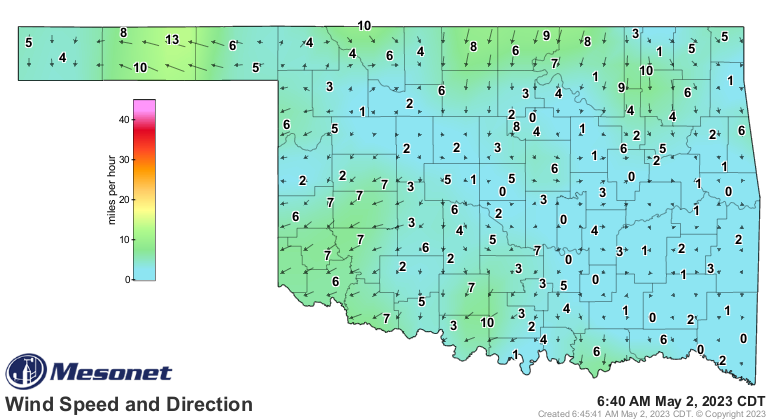

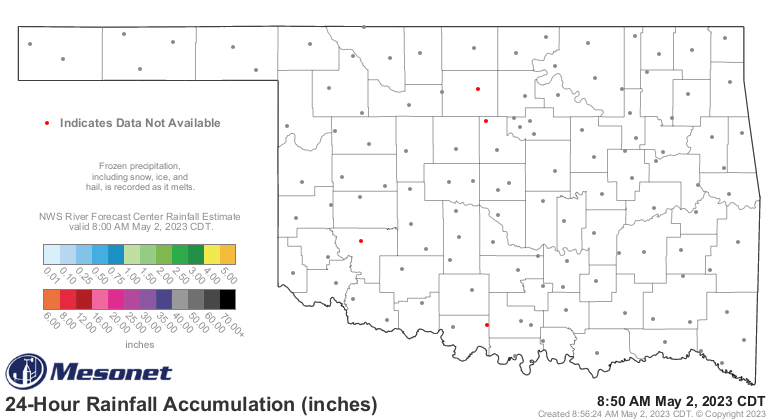

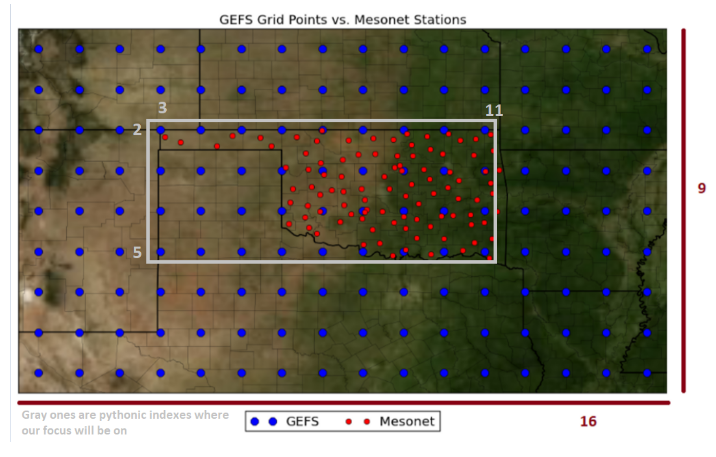

In [ ]:
nc_pwat_eatm_latlon['lat'][:][:].data[2:6]

array([33., 34., 35., 36.], dtype=float32)

In [ ]:
nc_pwat_eatm_latlon['lon'][:][:].data[3:12]

array([257., 258., 259., 260., 261., 262., 263., 264., 265.],
      dtype=float32)

In [ ]:
latlon = list(itertools.product(nc_pwat_eatm_latlon['lat'][:][:].data[2:6], nc_pwat_eatm_latlon['lon'][:][:].data[3:12]))
latlon

[(33.0, 257.0),
 (33.0, 258.0),
 (33.0, 259.0),
 (33.0, 260.0),
 (33.0, 261.0),
 (33.0, 262.0),
 (33.0, 263.0),
 (33.0, 264.0),
 (33.0, 265.0),
 (34.0, 257.0),
 (34.0, 258.0),
 (34.0, 259.0),
 (34.0, 260.0),
 (34.0, 261.0),
 (34.0, 262.0),
 (34.0, 263.0),
 (34.0, 264.0),
 (34.0, 265.0),
 (35.0, 257.0),
 (35.0, 258.0),
 (35.0, 259.0),
 (35.0, 260.0),
 (35.0, 261.0),
 (35.0, 262.0),
 (35.0, 263.0),
 (35.0, 264.0),
 (35.0, 265.0),
 (36.0, 257.0),
 (36.0, 258.0),
 (36.0, 259.0),
 (36.0, 260.0),
 (36.0, 261.0),
 (36.0, 262.0),
 (36.0, 263.0),
 (36.0, 264.0),
 (36.0, 265.0)]

# **Combining GEFS coordinates & date**

In [ ]:
len(latlon)

36

In [ ]:
df_nc_time = pd.DataFrame(nc_pwat_eatm_latlon['intValidTime'][:][:].data)
df_nc_time[0].apply(lambda x: int(str(x)[:8])).head()

0    19940101
1    19940102
2    19940103
3    19940104
4    19940105
Name: 0, dtype: int64

In [ ]:
date_latlon = list(itertools.product(df_nc_time[0].apply(lambda x: int(str(x)[:8])),latlon))
date_latlon[0]

(19940101, (33.0, 257.0))

In [ ]:
len(date_latlon)

184068

**Length of date_latlon(i.e. cobined co-ordinates of GEFS & date)
is equal to per year locations of GEFS sites 5113(i.e.days) multiplied by 36 locations**

In [ ]:
5113*36

184068

In [ ]:
latlon = list(itertools.product(nc_pwat_eatm_latlon['lat'][:][:].data[2:6], nc_pwat_eatm_latlon['lon'][:][:].data[3:12]))
df_nc_time = pd.DataFrame(nc_pwat_eatm_latlon['intValidTime'][:][:].data)
date_latlon = list(itertools.product(df_nc_time[0].apply(lambda x: int(str(x)[:8])),latlon))

In [ ]:
df_gefs = pd.DataFrame(date_latlon, columns=['date','coordinates'])
df_gefs.shape

(184068, 2)

In [ ]:
# df_gefs.rename({0:"date",1:"coordinates"}, axis=1, inplace=True)
df_gefs.head()

,date,coordinates
0,19940101,"(33.0, 257.0)"
1,19940101,"(33.0, 258.0)"
2,19940101,"(33.0, 259.0)"
3,19940101,"(33.0, 260.0)"
4,19940101,"(33.0, 261.0)"


#### Experimenting with 4 dimensional data & cropping it based on area we selected to work on

In [ ]:
nc_4dim.shape

(5113, 11, 9, 16)

In [ ]:
nc_4dim_cropped = nc_4dim[:,:,2:6,3:12]

In [ ]:
nc_4dim_cropped.shape

(5113, 11, 4, 9)

In [ ]:
5113*4*9

184068

In [ ]:
# x =  nc_4dim_cropped.reshape(5113*4*9,11)
y = pd.DataFrame(nc_4dim_cropped.reshape(5113*4*9,11))
print(y.shape)
y

In [ ]:
nc_4dim_cropped.reshape(5113*4*9,11)

#### **Building Data Pre-Processing Process**
* File extraction for GEFS variables
* Reshaping & aggregating dimensions
* Cropping based on given coordinates
* Calculate haversine distance between mesonets & GEFS
* Mapping mesonets to closest GEFS points

In [ ]:
from os import listdir

In [ ]:
def unzip_gefs(directory:str, dest_path:str='tarzip')->str:
    file_train = tarfile.open(directory)
    file_train.extractall(f'/content/working/{dest_path}')
    file_train.close()
    return "Unzipped files!"

In [ ]:
unzip_gefs(directory='/content/data/gefs_train.tar.gz')

In [ ]:
def pre_processing(data_dir='/content/working/tarzip/train/', agg_dims=['hours','ens_models'], crop_gefs_x_start=2, crop_gefs_x_end=6, crop_gefs_y_start=3, crop_gefs_y_end=12):
    # Looping through files holding GEFS data
    for n,f in enumerate(listdir(f'{data_dir}')):
        #print(n,f)
        # Reading data
        nc_ = Dataset(f'{data_dir}{f}')

        # extracting GEFS variable from netcdf
        nc_gefs = list(nc_.variables.values())[-1]

        if agg_dims == 'hours':
            # taking mean of the measurements taken in different times
            #print(f"shape before processing {nc_gefs.shape}")
            nc_agg = np.mean(nc_gefs, axis=2)
            #print("shape after taking mean of hours:")
            #print(nc_agg.shape)

        elif agg_dims == 'ens_models':
            # taking mean of the measurements taken in different times
            #print(f"shape before processing {nc_gefs.shape}")
            nc_agg = np.mean(nc_gefs, axis=1)
            #print("shape after taking mean of hours:")
            #print(nc_agg.shape)

        else:
            # taking mean of the measurements taken in different times
            nc_agg = np.mean(nc_gefs, axis=2)
            #print("shape after taking mean of hours:")
            #print(nc_agg.shape)
            nc_agg = np.mean(nc_agg, axis=1)
            #print("shape after taking mean of ensembles:")
            #print(nc_agg.shape)

        #print("=="*50)
        #print("AGGREGATING DONE!")
        #print("STARTING CROPPING...")

        # cropping GEFS based on lat-lon
        if agg_dims == 'hours':
            #print(f"shape before crop {nc_agg.shape}")
            nc_agg_cropped = nc_agg[:,:,crop_gefs_x_start:crop_gefs_x_end,crop_gefs_y_start:crop_gefs_y_end]
            #print(f"shape after crop {nc_agg_cropped.shape}")
        elif agg_dims == 'ens_models':
            #print(f"shape before crop {nc_agg.shape}")
            nc_agg_cropped = nc_agg[:,:, crop_gefs_x_start:crop_gefs_x_end,crop_gefs_y_start:crop_gefs_y_end]
            #print(f"shape after crop {nc_agg_cropped.shape}")
        else:
            #print(f"shape before crop {nc_agg.shape}")
            nc_agg_cropped = nc_agg[:, crop_gefs_x_start:crop_gefs_x_end,crop_gefs_y_start:crop_gefs_y_end]
            #print(f"shape after crop {nc_agg_cropped.shape}")

        #print("=="*50)
        #print("CROPPING DONE!")
        #print("STARTING RESHAPING...")

        # reshaping into 2 dimensions & converting to dataframe
        if agg_dims == 'hours':
            #print("we gotta form the shape dynamically too, rather than just giving the numbers")
            df_gefs_ = pd.DataFrame(nc_agg_cropped.reshape(np.prod(nc_agg_cropped.shape),1)) #5113*4*9*11
        elif agg_dims == 'ens_models':
            #print(nc_agg_cropped.shape)
            df_gefs_ = pd.DataFrame(nc_agg_cropped.reshape(np.prod(nc_agg_cropped.shape)//5,5)) #5113*4*9
        else:
            df_gefs_ = pd.DataFrame(nc_agg_cropped.reshape(np.prod(nc_agg_cropped.shape),1)) #5113*4*9

        #print("=="*50)
        #print("RESHAPING DONE!")
        #print("STARTING RENAMING...")

        # we will use the name of file to rename columns so we don't get confused as we keep appending files
        prefix = f.split("latlon")[0]

        # existing columns of dataframe we created
        cols = list(df_gefs_.columns)

        # creating new names for columns
        newcols = [prefix+str(c) for c in cols]

        # creating the dictionary to rename cols accordingly
        rename_cols = {cols[i]: newcols[i] for i in range(len(cols))}

        # changing names on the dataset & inplacing
        df_gefs_ = df_gefs_.rename(rename_cols, axis=1)

        if n == 0:
            latlon = list(itertools.product(nc_['lat'][:][:].data[crop_gefs_x_start:crop_gefs_x_end], nc_['lon'][:][:].data[crop_gefs_y_start:crop_gefs_y_end]))
            df_nc_time = pd.DataFrame(nc_['intValidTime'][:][:].data)
            date_latlon = list(itertools.product(df_nc_time[0].apply(lambda x: int(str(x)[:8])),latlon))
            df_gefs = pd.DataFrame(date_latlon, columns=['date','coordinates'])
            df_gefs = pd.concat([df_gefs,df_gefs_], axis = 1)
            #df_ens = df_ens_[:] # ======> created to do some feature eng on GEFS variables later
        else:
            df_gefs = pd.concat([df_gefs,df_gefs_], axis = 1)
            # printing shape to see if data is appended or duplicated
        #print(df_gefs.shape)
    return df_gefs

In [ ]:
#df_gefs = pre_processing(data_dir='/kaggle/working/tarzip/train/', agg_dims=['hours','ens_models'], crop_gefs_x_start=2, crop_gefs_x_end=6, crop_gefs_y_start=3, crop_gefs_y_end=12)
#df_gefs = pre_processing(data_dir='/kaggle/working/tarzip/train/', agg_dims='ens_models', crop_gefs_x_start=2, crop_gefs_x_end=6, crop_gefs_y_start=3, crop_gefs_y_end=12)
#df_gefs.shape

**Haversine: Calculate the distance (in various units) between two points on Earth using their latitude and longitude.**

In [ ]:
! pip install haversine

In [ ]:
# needed for min distance calculations
from haversine import haversine
def custom_haversine(coord1, coordDf):
    l={}
    for coord2, n_coord2 in list(zip(coordDf.coord, coordDf.normalized_coord)):
        l[coord2] = haversine(coord1,n_coord2)
    return l

In [ ]:
def get_min_distance_node(df_gefs):
    # Get normalized GEFS coordinates
    df_gefs_loc = pd.DataFrame(df_gefs['coordinates'].unique(), columns=['coord'])
    df_gefs_loc['normalized_coord'] = df_gefs_loc['coord'].apply( lambda x: (x[0], x[1]-360))
    # Read mesonet metadata
    df_mes = pd.read_csv("/content/data/station_info.csv")
    # zip coordinates for later calculations
    df_mes["coord"] = list(zip(df_mes.nlat, df_mes.elon))
    # calculate haversine distances between the area we cropped and mesonets
    df_mes['new_distances'] = df_mes['coord'].apply(lambda x: custom_haversine(x, df_gefs_loc))
    # Find minimum distance GEFS for every mesonet
    df_mes['min_dist_node'] = df_mes['new_distances'].apply(lambda x: list(x.keys())[list(x.values()).index(min(x.values()))])
    return df_mes

In [ ]:
def get_one_ens(df_gefs, ens_model=0):
    # taking only one ensemble model = number 0
    #ens = ['date', 'coordinates']
    ens = [col for col in df_gefs.columns if col.split("_")[-1]==f"{ens_model}" ]
    ens.insert(0,'date')
    ens.insert(1,'coordinates')
    # crop df_gefs based on the ens model we wanna get
    df_gefs_ens = df_gefs[ens]
    return df_gefs_ens


In [ ]:
def combine_ens_gefs(df_mes, df_train_csv):
    # create mesonet list
    mesonets = list(df_mes['stid'])
    # melt training dataframe so mesonets are in rows instead of columns
    df_train = pd.melt(df_train_csv, id_vars='Date', value_vars=mesonets,\
                 var_name='stid', value_name='Daily_Production')
    # combine distance related features from metadata to training data
    df_train = pd.merge(df_train, df_mes[['stid','new_distances','min_dist_node']], on='stid', how='left')
    # create join columns
    df_train['join'] = df_train['Date'].astype(str) + df_train['min_dist_node'].astype(str)
    df_gefs_ens['join'] = df_gefs_ens['date'].astype(str) + df_gefs_ens['coordinates'].astype(str)
    # join two dataframes
    df_train_merged = pd.merge(df_train, df_gefs_ens[['tcolc_eatm_0', 'ulwrf_tatm_0', 'dlwrf_sfc_0','tmp_sfc_0', 'tcdc_eatm_0', 'dswrf_sfc_0', 'tmax_2m_0', 'tmin_2m_0','pwat_eatm_0', 'uswrf_sfc_0', 'spfh_2m_0', 'ulwrf_sfc_0', 'tmp_2m_0','apcp_sfc_0', 'pres_msl_0', 'join']], how='left', on='join')
    return df_train_merged

In [ ]:
# pipeline
df_gefs = pre_processing(data_dir='/content/working/tarzip/train/', agg_dims=['hours','ens_models'], crop_gefs_x_start=2, crop_gefs_x_end=6, crop_gefs_y_start=3, crop_gefs_y_end=12)
df_gefs

In [ ]:
df_mes = get_min_distance_node(df_gefs)
df_mes

In [ ]:
df_gefs_ens = get_one_ens(df_gefs)
df_train_csv = pd.read_csv('/content/data/train.csv')
df_train_merged = combine_ens_gefs(df_mes, df_train_csv)

In [ ]:
df_train_merged.head()

#### Checking for multicollinearity
The explanation of GEFS variables seems as if they can have correlation with each other. I used statsmodel library to check VIF (Variance Inflation Factor)

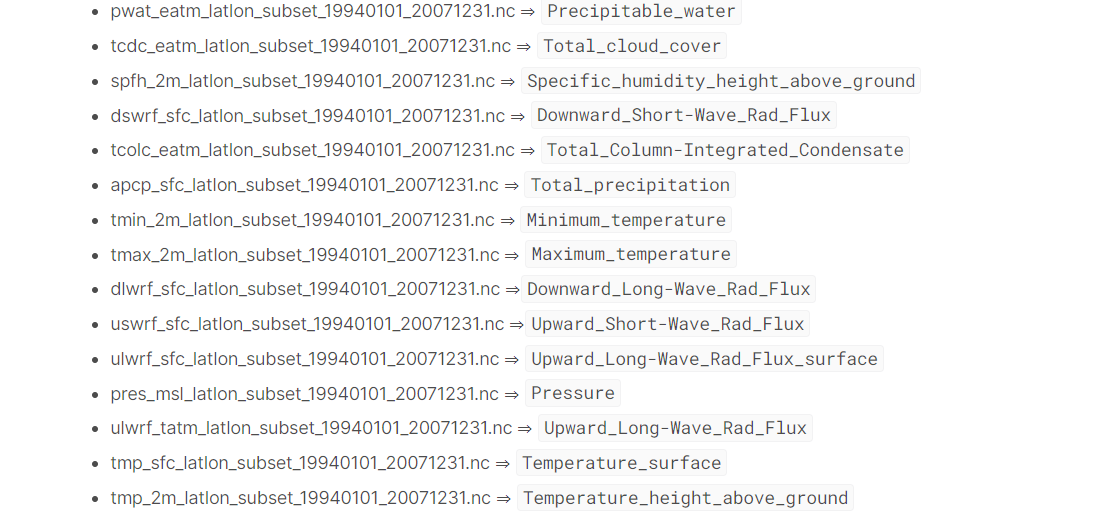

In [ ]:
# import libraries


When independent variables are highly correlated, change in one variable would cause change to another and so the model results fluctuate significantly. The model results will be unstable and vary a lot given a small change in the data or model

**It create the following problems**
  * choose the list of significant variables
  * Coefficient Estimates would not be stable
  * The unstable nature of the model may cause overfitting
  

In [ ]:
def check_multicollinearity(data:pd.DataFrame, is_gefs:bool)->pd.DataFrame:
    """
    Function to take a pandas dataframe and calculate VIF for multicollinearity
    """
    import statsmodels.api as sm
    from statsmodels.stats.outliers_influence import variance_inflation_factor

    data = sm.add_constant(data)

    # VIF dataframe
    vif_data = pd.DataFrame()
    vif_data["feature"] = data.columns

    if is_gefs==True:
        desc_dict = {
                    'tcolc_eatm_0': 'Total_Column-Integrated_Condensate',
                     'ulwrf_tatm_0': 'Upward_Long-Wave_Rad_Flux',
                     'dlwrf_sfc_0': 'Downward_Long-Wave_Rad_Flux',
                     'tmp_sfc_0': 'Temperature_surface',
                     'tcdc_eatm_0': 'Total_cloud_cover',
                     'dswrf_sfc_0': 'Downward_Short-Wave_Rad_Flux',
                     'tmax_2m_0': 'Maximum_temperature',
                     'tmin_2m_0': 'Minimum_temperature',
                     'pwat_eatm_0': 'Precipitable_water',
                     'uswrf_sfc_0': 'Upward_Short-Wave_Rad_Flux',
                     'spfh_2m_0': 'Specific_humidity_height_above_ground',
                     'ulwrf_sfc_0': 'Upward_Long-Wave_Rad_Flux_surface',
                     'tmp_2m_0': 'Temperature_height_above_ground',
                     'apcp_sfc_0': 'Total_precipitation',
                     'pres_msl_0': 'Pressure'}
        vif_data["desc"] = vif_data['feature'].map(desc_dict)

    # calculating VIF for each feature
    vif_data["VIF"] = [variance_inflation_factor(data.values, i) for i in range(len(data.columns))]
    return vif_data

### Then possible solution is
  * Variable Selection - most straightforward method is to remove some variables that are highly correlated to others and leave the more significant ones in the set
  * PCA - commonly used to reduce the dimension of data by decomposing data into a number of independent factors and to get rid of multicollinearity

In [ ]:
def principal_comp_analysis(data:pd.DataFrame, plot_exp_var:bool, n_comp:int=10)->pd.DataFrame:
    from sklearn.decomposition import PCA
    from sklearn.preprocessing import MinMaxScaler
    import numpy as np

    # Since it is a variance minimizing exercise, we normalize our data before performing PCA on that.
    # use minMax scaler
    min_max_scaler = MinMaxScaler()
    data_n = min_max_scaler.fit_transform(data)

    if plot_exp_var==True:
        import matplotlib.pyplot as plt

        pca = PCA()
        pca.fit(data_n)
        print("Explained variance from all features: ")
        print(pca.explained_variance_)
        # how to pick n_components for PCA
        plt.plot(np.cumsum(pca.explained_variance_ratio_))
        plt.xlabel('number of components')
        plt.ylabel('cumulative explained variance')
        plt.show()

    pca_res = PCA(n_components=n_comp)
    pcomp = pca_res.fit_transform(data_n)

    pca_df = pd.DataFrame(data = pcomp
                 , columns = [f'principal_component_{i}' for i in range(1,11)])

    return pca_df

### Model Building

#### Traditional Machine Learning Models

In [ ]:
# Data preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
# ML Models
from sklearn import metrics
from sklearn.linear_model import Ridge, LinearRegression, Lasso, ElasticNet, SGDRegressor, PassiveAggressiveRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

# Neural Net modules
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

In [ ]:
training_set = df_train_merged[['tcolc_eatm_0', 'ulwrf_tatm_0', 'dlwrf_sfc_0', 'tmp_sfc_0', \
       'tcdc_eatm_0', 'dswrf_sfc_0', 'tmax_2m_0', 'tmin_2m_0', 'pwat_eatm_0', \
       'uswrf_sfc_0', 'spfh_2m_0', 'ulwrf_sfc_0', 'tmp_2m_0', 'apcp_sfc_0', 'pres_msl_0']]
y = df_train_merged['Daily_Production']

In [ ]:
training_set.head()

In [ ]:
# training set after PCA
training_pca = principal_comp_analysis(training_set, plot_exp_var=True)

In [ ]:
# train-test splitting for traditional ML methods
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(training_pca, y, test_size=.20, random_state=0)

In [ ]:
# Training & testing multiple models in loop
models_reg = [Ridge(), LinearRegression(), Lasso(), ElasticNet(), SGDRegressor(), PassiveAggressiveRegressor(), DecisionTreeRegressor(max_depth=3), DecisionTreeRegressor(max_depth=5),
SVR(C=1.0, epsilon=0.2) ]

In [ ]:
"""
# model w normalization & PCA:
for m in models:
    print(f"{m} Regression - With normalization: ")
    model_r = m
    model_r.fit(X_train_pca, y_train_pca)
    preds_r = model_r.predict(X_test_pca)
    mae = metrics.mean_absolute_error(y_test_pca,preds_r)
    print(f"MAE: {mae}")

    print("---"*20)"""

In [ ]:
%%time
model_lr = LinearRegression()
model_lr.fit(X_train_pca, y_train_pca)
preds_lr = model_lr.predict(X_test_pca)
mae = metrics.mean_absolute_error(y_test_pca,preds_lr)
print(f"MAE: {mae}")

In [ ]:
%%time
model_rf = RandomForestRegressor()
model_rf.fit(X_train_pca, y_train_pca)
preds_rf = model_rf.predict(X_test_pca)
mae = metrics.mean_absolute_error(y_test_pca,preds_rf)
print(f"MAE: {mae}")

In [ ]:
mesonets = ['ACME', 'ADAX', 'ALTU', 'APAC', 'ARNE', 'BEAV', 'BESS', 'BIXB', 'BLAC', 'BOIS', 'BOWL', 'BREC', 'BRIS', 'BUFF', 'BURB', 'BURN', 'BUTL', 'BYAR',
            'CAMA', 'CENT', 'CHAN', 'CHER', 'CHEY', 'CHIC', 'CLAY', 'CLOU', 'COOK', 'COPA', 'DURA', 'ELRE', 'ERIC', 'EUFA', 'FAIR', 'FORA', 'FREE', 'FTCB',
            'GOOD', 'GUTH', 'HASK', 'HINT', 'HOBA', 'HOLL', 'HOOK', 'HUGO', 'IDAB', 'JAYX', 'KENT', 'KETC', 'LAHO', 'LANE', 'MADI', 'MANG', 'MARE', 'MAYR',
            'MCAL', 'MEDF', 'MEDI', 'MIAM', 'MINC', 'MTHE', 'NEWK', 'NINN', 'NOWA', 'OILT', 'OKEM', 'OKMU', 'PAUL', 'PAWN', 'PERK', 'PRYO', 'PUTN', 'REDR',
            'RETR', 'RING', 'SALL', 'SEIL', 'SHAW', 'SKIA', 'SLAP', 'SPEN', 'STIG', 'STIL', 'STUA', 'SULP', 'TAHL', 'TALI', 'TIPT', 'TISH', 'VINI', 'WASH',
            'WATO', 'WAUR', 'WEAT', 'WEST', 'WILB', 'WIST', 'WOOD', 'WYNO']

In [ ]:
unzip_gefs(directory='/content/data/gefs_test.tar.gz')
df_gefs_test = pre_processing(data_dir='/content/working/tarzip/test/', agg_dims=['hours','ens_models'], crop_gefs_x_start=2, crop_gefs_x_end=6, crop_gefs_y_start=3, crop_gefs_y_end=12)

In [ ]:
df_test_csv = pd.read_csv('/content/data/test.csv')

In [ ]:
for mesonet in mesonets:
    min_dist_gefs = df_mes[df_mes.stid==mesonet]
    coord = min_dist_gefs.iloc[0,6]
    pred_set = df_gefs_test[df_gefs_test.coordinates==coord]
    pred_pca = principal_comp_analysis(pred_set.iloc[:,2:], plot_exp_var=False)
    df_test_csv[mesonet]=model_rf.predict(pred_pca)
df_test_csv.to_csv(f'/content/working/tarzip/submission_{model_rf}.csv',index=False)

In [ ]:
%%time
model_ridge = Ridge()
model_ridge.fit(X_train_pca, y_train_pca)
preds_ridge = model_ridge.predict(X_test_pca)
mae = metrics.mean_absolute_error(y_test_pca,preds_ridge)
print(f"MAE: {mae}")

In [ ]:
%%time
model_dtr = DecisionTreeRegressor(max_depth=5)
model_dtr.fit(X_train_pca, y_train_pca)
preds_dtr = model_dtr.predict(X_test_pca)
mae = metrics.mean_absolute_error(y_test_pca,preds_dtr)
print(f"MAE: {mae}")

In [ ]:
#%%time
#from sklearn.svm import SVR

#model_SVR = SVR(kernel='linear')
#model_SVR.fit(X_train_pca[:200000], y_train_pca[:200000])
#preds = model_SVR.predict(X_test_pca)
#mae = metrics.mean_absolute_error(y_test_pca,preds)
#print(f"MAE: {mae}")

## ANN Model

In [ ]:
import tensorflow as tf

In [ ]:
import tensorflow as tf
tf.__version__

!sudo pip3 install keras

In [ ]:
%%time
from tensorflow.keras.layers import InputLayer

# build the model!
model_ann = Sequential()
model_ann.add(InputLayer(input_shape=(X_train_pca.shape[1],)))
model_ann.add(Dense(50, activation='relu'))
model_ann.add(Dense(25, activation='relu'))
model_ann.add(Dense(1, activation='linear')) # output node
model_ann.summary() # see what your model looks like

# compile the model
model_ann.compile(optimizer='adam', loss='mae', metrics=['mse'])

# early stopping callback
es = EarlyStopping(monitor='loss',
                   mode='min',
                   patience=50,
                   restore_best_weights = True)

# fit the model!
# attach it to a new variable called 'history' in case
# to look at the learning curves
history = model_ann.fit(X_train_pca, y_train_pca,
                    #validation_data = (X_test_pca, y_test_pca),
                    callbacks=[es],
                    epochs=100,
                    batch_size=50,
                    verbose=1)

test_loss, test_acc = model_ann.evaluate(X_test_pca, y_test_pca)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

### Predicting

In [ ]:
model_list = [model_lr,model_ridge, model_dtr, model_ann]